In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
###Helper functions

#function to convert all account balance values to naira
def switch_ccy(col):
    CCY = col[0]
    ACY_AVL_BAL = col[1]
    
    if ACY_AVL_BAL>=-10000000000:
        if CCY == 'GBP':
            return ACY_AVL_BAL*479.79
        elif CCY == 'USD':
            return ACY_AVL_BAL*386.57
        elif CCY == 'EUR':
            return ACY_AVL_BAL*417.97
        else:
            return ACY_AVL_BAL


    
##function to rate customers based on account balance

def balance_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=1000:
        rating = 4
    elif col<=5000:
        rating = 5
    elif col<=10000:
        rating = 6
    elif col<=50000:
        rating = 6
    elif col<=100000:
        rating = 7
    elif col<=500000:
        rating = 8
    elif col<=1000000:
        rating = 9
    else:
        rating = 10
    
    return rating


def debt_rating(col):

    
    if col<=0:
        rating = 10
    elif col<=1000:
        rating = 9
    elif col<=5000:
        rating = 8
    elif col<=10000:
        rating = 7
    elif col<=50000:
        rating = 6
    elif col<=100000:
        rating = 6
    elif col<=500000:
        rating = 5
    elif col<=1000000:
        rating = 4
    elif col<=10000000:
        rating = 2
    else:
        rating = 0
    
    return rating




def invest_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=1000:
        rating = 2
    elif col<=5000:
        rating = 3
    elif col<=10000:
        rating = 4
    elif col<=50000:
        rating = 5
    elif col<=100000:
        rating = 6
    elif col<=500000:
        rating = 6
    elif col<=1000000:
        rating = 7
    elif col<=5000000:
        rating = 8
    elif col<=10000000:
        rating = 9
    else:
        rating = 10
    
    return rating





def roi_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=10000:
        rating = 2
    elif col<=50000:
        rating = 3
    elif col<=100000:
        rating = 5
    elif col<=500000:
        rating = 5.5
    elif col<=1000000:
        rating = 6
    elif col<=5000000:
        rating = 7
    elif col<=1000000:
        rating = 8
    elif col<=5000000:
        rating = 9
    elif col<=10000000:
        rating = 9.5
    else:
        rating = 10
    
    return rating


def tenure_rating(col):
    
    if col<=0:
        rating = 0
    elif col<=50:
        rating = 1
    elif col<=100:
        rating = 2 
    elif col<=150:
        rating = 3
    elif col<=200:
        rating = 4
    elif col<=250:
        rating = 5
    elif col<=300:
        rating = 6
    elif col<=350:
        rating = 7
    elif col<=400:
        rating = 8
    elif col<=450:
        rating = 9
    else:
        rating = 10
    
    return abs(rating)


    

***Engineering the Accounts table to extract features for rating the customers' current account balances.

In [3]:
#### Reading the all_accounts table into Python
all_accounts = pd.read_csv('all_accounts.csv')

In [4]:
all_accounts.head()

CUSTOMER_UNIQUE_ID MASKED_ACCOUNT RECORD_STAT  ACY_AVL_BAL  CCY
0            69090004     00******87           O       625.00  GBP
1            69090004     08******25           O         0.00  NGN
2            69090004     07******90           C         0.00  USD
3            69090004     00******24           O       245.16  USD
4            69090004     00******12           O   1262799.23  NGN

In [5]:
#create a new column in the dataframe and apply the switch_ccy function to convert all balances to naira
all_accounts['converted_bal'] = all_accounts[['CCY', 'ACY_AVL_BAL']].apply(switch_ccy, axis = 1)

In [6]:
all_accounts.head()

CUSTOMER_UNIQUE_ID MASKED_ACCOUNT RECORD_STAT  ACY_AVL_BAL  CCY  \
0            69090004     00******87           O       625.00  GBP   
1            69090004     08******25           O         0.00  NGN   
2            69090004     07******90           C         0.00  USD   
3            69090004     00******24           O       245.16  USD   
4            69090004     00******12           O   1262799.23  NGN   

   converted_bal  
0   2.998688e+05  
1   0.000000e+00  
2   0.000000e+00  
3   9.477150e+04  
4   1.262799e+06

In [7]:
#Add all the account balances for each customer and get their net balance with the bank
all_accounts_sorted = all_accounts.groupby('CUSTOMER_UNIQUE_ID').sum()
all_accounts_sorted

ACY_AVL_BAL  converted_bal
CUSTOMER_UNIQUE_ID                            
56000                 136043.48   1.360435e+05
62005                1531800.95   1.542308e+06
104008                 12364.06   1.236406e+04
175007                 20029.55   2.002955e+04
200006                 61489.56   6.148956e+04
...                         ...            ...
999737005                480.96   4.809600e+02
999823007                  0.71   7.100000e-01
999881002                  0.00   0.000000e+00
999943009                 43.91   4.391000e+01
999944001                 43.87   4.387000e+01

[17975 rows x 2 columns]

In [8]:
all_accounts_sorted['rated_bal'] = all_accounts_sorted['converted_bal'].apply(balance_rating)

In [9]:
#convert all_accounts_sorted from a pandas series to a dataframe
all_accounts_sorted_DF = pd.DataFrame(all_accounts_sorted)
all_accounts_sorted_DF

ACY_AVL_BAL  converted_bal  rated_bal
CUSTOMER_UNIQUE_ID                                       
56000                 136043.48   1.360435e+05          8
62005                1531800.95   1.542308e+06         10
104008                 12364.06   1.236406e+04          6
175007                 20029.55   2.002955e+04          6
200006                 61489.56   6.148956e+04          7
...                         ...            ...        ...
999737005                480.96   4.809600e+02          4
999823007                  0.71   7.100000e-01          4
999881002                  0.00   0.000000e+00          0
999943009                 43.91   4.391000e+01          4
999944001                 43.87   4.387000e+01          4

[17975 rows x 3 columns]

In [10]:
print('The shape of the all_accounts_sorted df is {}'.format(all_accounts_sorted_DF.shape))

The shape of the all_accounts_sorted df is (17975, 3)


In [11]:
AccountsRating = all_accounts_sorted_DF[['rated_bal']]
AccountsRating

rated_bal
CUSTOMER_UNIQUE_ID           
56000                       8
62005                      10
104008                      6
175007                      6
200006                      7
...                       ...
999737005                   4
999823007                   4
999881002                   0
999943009                   4
999944001                   4

[17975 rows x 1 columns]

***Engineering the Balances data table to extract features for rating the customers' previous account balances overtime, the mean and the maximum balances and their ratings out of 10.

In [12]:
balances = pd.read_csv('all_balances.csv')

In [13]:
#AGGREGATE THE ACCOUNT BALANCES BY MEAN
mean_balance = balances.groupby('CUSTOMER_UNIQUE_ID').mean()

In [14]:
mean_balance.columns = ['mean_balance']
Rated_bal_DF = pd.DataFrame(mean_balance)

In [15]:
#DO THE SAME FOR MAXIMUM BALANCE AND THE SUM OF THE BALANCES IN THE ACCOUNT OF EACH CUSTOMER
Rated_bal_DF['max_balance']=balances.groupby('CUSTOMER_UNIQUE_ID').max()['BAL']
Rated_bal_DF['balance_history']=balances.groupby('CUSTOMER_UNIQUE_ID').sum()['BAL']
Rated_bal_DF['mean_balance_rated'] = Rated_bal_DF['mean_balance'].apply(balance_rating) #APPLY THE RATING FUNCTION TO RATE EACH BALANCE
Rated_bal_DF['max_balance_rated'] = Rated_bal_DF['max_balance'].apply(balance_rating)
Rated_bal_DF['balance_history_rated'] = Rated_bal_DF['balance_history'].apply(balance_rating)

In [16]:
Rated_bal_DF

mean_balance  max_balance  balance_history  \
CUSTOMER_UNIQUE_ID                                                
56000                38235.144444    145043.48        688232.60   
62005               134025.795848   2000405.57      22918411.09   
104008               46854.546618    446593.07       6372218.34   
175007              107008.290792    500015.62      10807837.37   
200006               33340.945385    116805.33       1733729.16   
...                           ...          ...              ...   
999737005             4013.467042     16736.96        284956.16   
999823007             7912.571071     27964.59        664655.97   
999881002            38413.173158    234513.31       2189550.87   
999943009             1083.313208     23266.08         57415.60   
999944001            40207.878276    141792.78       1166028.47   

                    mean_balance_rated  max_balance_rated  \
CUSTOMER_UNIQUE_ID                                          
56000                                6                  8   
62005                                8                 10   
104008                               6                  8   
175007                               8                  9   
200006                               6                  8   
...                                ...                ...   
999737005                            5                  6   
999823007                            6                  6   
999881002                            6                  8   
999943009                            5                  6   
999944001                            6                  8   

                    balance_history_rated  
CUSTOMER_UNIQUE_ID                         
56000                                   9  
62005                                  10  
104008                                 10  
175007                                 10  
200006                                 10  
...                                   ...  
999737005                               8  
999823007                               9  
999881002                              10  
999943009                               7  
999944001                              10  

[17496 rows x 6 columns]

In [17]:
BalanceRating = Rated_bal_DF[['mean_balance_rated', 'max_balance_rated', 'balance_history_rated']]
BalanceRating.head(1)

mean_balance_rated  max_balance_rated  \
CUSTOMER_UNIQUE_ID                                          
56000                                6                  8   

                    balance_history_rated  
CUSTOMER_UNIQUE_ID                         
56000                                   9

***Engineering the Transactions data table to extract features for rating the transaction history of all customers and to have an idea of the net cash flow in and out of their accounts.

In [18]:
trans = pd.read_csv('all_transactions_digital.csv')

In [19]:
trans.head()

CUSTOMER_UNIQUE_ID MASKED_ACCT        TRN_REF_NO AC_CCY DRCR_IND TRN_CODE  \
0           639103002  00******23  133ICEBNGN 00002    NGN        C      CIN   
1           563391007  00******98  0981356192730075    NGN        D      CWR   
2           563391007  00******98  098AWRI801180wJs    NGN        D      CWR   
3           563391007  00******98  098AWRI801180wKb    NGN        D      CWR   
4           563391007  00******98  098AWRI801180dLN    NGN        D      CWR   

   FCY_AMOUNT  EXCH_RATE  LCY_AMOUNT               TRN_DT  
0         NaN        NaN        0.01  2019-09-30 00:00:00  
1         NaN        NaN     2000.00  2019-09-30 00:00:00  
2         NaN        NaN     2000.00  2019-09-30 00:00:00  
3         NaN        NaN     2000.00  2019-09-30 00:00:00  
4         NaN        NaN     2000.00  2019-09-30 00:00:00

In [20]:
#SELECT USEFUL COLUMNS ONLY
new_trans = trans[['CUSTOMER_UNIQUE_ID', 'AC_CCY', 'LCY_AMOUNT', 'DRCR_IND']]

In [21]:
#Convert the transaction balances in LCY_AMOUNT to naira using the switch_ccy function
new_trans['Naira_LCY_AMOUNT'] = new_trans[['AC_CCY', 'LCY_AMOUNT']].apply(switch_ccy, axis = 1)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#group by customer_uniuqe_id and debit or credit
new_trans_try = new_trans.groupby(['CUSTOMER_UNIQUE_ID','DRCR_IND']).sum()

In [23]:
#create a dataframe from the groupby object
new_trans_DF= pd.DataFrame(new_trans_try)

In [24]:
new_trans_DF.drop('LCY_AMOUNT', axis = 1)

Naira_LCY_AMOUNT
CUSTOMER_UNIQUE_ID DRCR_IND                  
56000              C             3.101874e+06
                   D             2.956830e+06
62005              C             9.572054e+06
                   D             8.005584e+06
104008             C             5.804516e+06
...                                       ...
999881002          D             3.492407e+06
999943009          C             8.453925e+05
                   D             8.496956e+05
999944001          C             3.619596e+05
                   D             3.744245e+05

[35568 rows x 1 columns]

In [25]:
new_trans_DF_clone = new_trans_DF

In [26]:
new_trans_DF_clone.reset_index(inplace = True)

In [28]:
#This forloop subtracts the debit from credit for each customer to get the net cash flow. It also calculates the total credits and total debits
net_cash = []
total_credit=[]
total_debit=[]
CUSTOMER_UNIQUE_ID=[]
for j in new_trans_DF_clone.index:
    if j%2!=0:
        total_debit.append(new_trans_DF_clone.iloc[j]['Naira_LCY_AMOUNT'])
        total_credit.append(new_trans_DF_clone.iloc[j-1]['Naira_LCY_AMOUNT'])
        net_cash.append(new_trans_DF_clone.iloc[j-1]['Naira_LCY_AMOUNT'] - new_trans_DF_clone.iloc[j]['Naira_LCY_AMOUNT'])
        CUSTOMER_UNIQUE_ID.append(new_trans_DF_clone.iloc[j]['CUSTOMER_UNIQUE_ID'])

In [29]:
#Convert the lists to series and concatenate them into a dataframe
CUSTOMER_UNIQUE_ID = pd.Series(CUSTOMER_UNIQUE_ID)
total_debit = pd.Series(total_debit)
total_credit = pd.Series(total_credit)
net_cash = pd.Series(net_cash)

Cashflow_DF = pd.concat([CUSTOMER_UNIQUE_ID, total_debit, total_credit, net_cash], axis =1)
Cashflow_DF.columns = ['CUSTOMER_UNIQUE_ID', 'total_debit', 'total_credit', 'net_cash']#set column names


In [30]:
Cashflow_DF

CUSTOMER_UNIQUE_ID   total_debit  total_credit      net_cash
0                   56000  2.956830e+06  3.101874e+06  1.450435e+05
1                   62005  8.005584e+06  9.572054e+06  1.566470e+06
2                  104008  5.809491e+06  5.804516e+06 -4.974960e+03
3                  175007  1.390857e+06  1.417134e+06  2.627714e+04
4                  200006  2.649034e+06  2.710016e+06  6.098221e+04
...                   ...           ...           ...           ...
17779           999737005  1.802696e+05  1.807006e+05  4.310600e+02
17780           999823007  8.222580e+05  7.866945e+05 -3.556350e+04
17781           999881002  3.492407e+06  3.308102e+06 -1.843050e+05
17782           999943009  8.496956e+05  8.453925e+05 -4.303060e+03
17783           999944001  3.744245e+05  3.619596e+05 -1.246484e+04

[17784 rows x 4 columns]

In [31]:
Cashflow_DF.set_index('CUSTOMER_UNIQUE_ID') #set index as customer_id

total_debit  total_credit      net_cash
CUSTOMER_UNIQUE_ID                                          
56000               2.956830e+06  3.101874e+06  1.450435e+05
62005               8.005584e+06  9.572054e+06  1.566470e+06
104008              5.809491e+06  5.804516e+06 -4.974960e+03
175007              1.390857e+06  1.417134e+06  2.627714e+04
200006              2.649034e+06  2.710016e+06  6.098221e+04
...                          ...           ...           ...
999737005           1.802696e+05  1.807006e+05  4.310600e+02
999823007           8.222580e+05  7.866945e+05 -3.556350e+04
999881002           3.492407e+06  3.308102e+06 -1.843050e+05
999943009           8.496956e+05  8.453925e+05 -4.303060e+03
999944001           3.744245e+05  3.619596e+05 -1.246484e+04

[17784 rows x 3 columns]

In [32]:
## Applying the balance rating function to get the balance rating on the Cashflow dataframe

Cashflow_DF['net_cash_rating'] =Cashflow_DF.net_cash.apply(balance_rating)
Cashflow_DF

CUSTOMER_UNIQUE_ID   total_debit  total_credit      net_cash  \
0                   56000  2.956830e+06  3.101874e+06  1.450435e+05   
1                   62005  8.005584e+06  9.572054e+06  1.566470e+06   
2                  104008  5.809491e+06  5.804516e+06 -4.974960e+03   
3                  175007  1.390857e+06  1.417134e+06  2.627714e+04   
4                  200006  2.649034e+06  2.710016e+06  6.098221e+04   
...                   ...           ...           ...           ...   
17779           999737005  1.802696e+05  1.807006e+05  4.310600e+02   
17780           999823007  8.222580e+05  7.866945e+05 -3.556350e+04   
17781           999881002  3.492407e+06  3.308102e+06 -1.843050e+05   
17782           999943009  8.496956e+05  8.453925e+05 -4.303060e+03   
17783           999944001  3.744245e+05  3.619596e+05 -1.246484e+04   

       net_cash_rating  
0                    8  
1                   10  
2                    0  
3                    6  
4                    7  
...                ...  
17779                4  
17780                0  
17781                0  
17782                0  
17783                0  

[17784 rows x 5 columns]

In [33]:
## Taking out the needed columns
CashflowRating = Cashflow_DF[['CUSTOMER_UNIQUE_ID', 'net_cash_rating']]
CashflowRating

CUSTOMER_UNIQUE_ID  net_cash_rating
0                   56000                8
1                   62005               10
2                  104008                0
3                  175007                6
4                  200006                7
...                   ...              ...
17779           999737005                4
17780           999823007                0
17781           999881002                0
17782           999943009                0
17783           999944001                0

[17784 rows x 2 columns]

In [34]:
CashflowRating.set_index('CUSTOMER_UNIQUE_ID') #set index as customer_id

net_cash_rating
CUSTOMER_UNIQUE_ID                 
56000                             8
62005                            10
104008                            0
175007                            6
200006                            7
...                             ...
999737005                         4
999823007                         0
999881002                         0
999943009                         0
999944001                         0

[17784 rows x 1 columns]

***Working on the Bureau dataset to extract features to take a look at the net debt the customers owe and for rating their debt profile.

In [35]:
bureau = pd.read_csv('bureau_score.csv')
bureau

CUSTOMER_UNIQUE_ID  CUSTOMER_TYPE  BUREAU_SCORE  APPROVED_AMT  \
0                206713006            NaN             0           0.0   
1                249434003            NaN             0    20000000.0   
2                232404006            NaN             0           0.0   
3                280412004            NaN             0           0.0   
4                234003003            NaN             0           0.0   
...                    ...            ...           ...           ...   
879175           688861011            NaN             0      648900.0   
879176           688861011            NaN             0           0.0   
879177           688861011            NaN             0      954143.0   
879178           602343010            NaN             0           0.0   
879179           688861011            NaN             0      640000.0   

               CPO  LOAN_CT  TOTAL_RENTALS  LOAN_CT_NON_DELQ  BAL_NON_DELQ  \
0            179.0        1            0.0                 0           0.0   
1       21200000.0        1     10800000.0                 0           0.0   
2              0.0        1            0.0                 1           0.0   
3              0.0        1            0.0                 1           0.0   
4              0.0        1            0.0                 1           0.0   
...            ...      ...            ...               ...           ...   
879175    644380.0        3        22227.0                 3      644380.0   
879176  10344455.0        1     10344455.0                 0           0.0   
879177    580489.0        3        27277.0                 2       43267.0   
879178      7341.0        1          500.0                 0           0.0   
879179     10054.0        2        25737.0                 2       10054.0   

        LOAN_CT_30DPD   BAL_30DPD  LOAN_CT_60DPD  BAL_60DPD  LOAN_CT_PL_90DPD  \
0                   0         0.0              0          0                 1   
1                   1  21200000.0              0          0                 0   
2                   0         0.0              0          0                 0   
3                   0         0.0              0          0                 0   
4                   0         0.0              0          0                 0   
...               ...         ...            ...        ...               ...   
879175              0         0.0              0          0                 0   
879176              0         0.0              0          0                 1   
879177              1    537222.0              0          0                 0   
879178              0         0.0              0          0                 1   
879179              0         0.0              0          0                 0   

        BAL_PL_90DPD  
0              179.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
879175           0.0  
879176    10344455.0  
879177           0.0  
879178        7341.0  
879179           0.0  

[879180 rows x 15 columns]

In [36]:
       ############     Summing up the 30days, 60days and the 90days balances
debtProfile=bureau[['CUSTOMER_UNIQUE_ID','BAL_30DPD', 'BAL_60DPD', 'BAL_PL_90DPD']]


In [37]:
debtProfile['TotalDebts'] = debtProfile.apply(lambda row: row.BAL_30DPD + row.BAL_60DPD + row.BAL_PL_90DPD, axis=1)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
debtProfile = debtProfile.groupby("CUSTOMER_UNIQUE_ID").sum()

In [39]:
debtProfile['DebtRating'] = debtProfile['TotalDebts'].apply(debt_rating)

In [40]:
debtProfile = debtProfile[['DebtRating']]
debtProfile

DebtRating
CUSTOMER_UNIQUE_ID            
1004                         2
1008                         5
6001                        10
20004                       10
62006                        5
...                        ...
999911009                    9
999934001                   10
999942001                   10
999971002                   10
999982000                   10

[95195 rows x 1 columns]

***Read in the Investment table. Here we can get to see the strength of the customers' investments and get to rate them too, out of 10.

In [41]:
                           ############   from the all investment table   ###########
investment = pd.read_csv('all_investments.csv')

In [42]:
investment['TotalInvestments']= investment[['CURRENCY', 'LCY_AMOUNT']].apply(switch_ccy, axis=1)

In [43]:
investment['ROI']= investment.apply(lambda row: row.TotalInvestments * row.MAIN_COMP_RATE, axis=1)

In [44]:
dfInvestment = investment[['CUSTOMER_UNIQUE_ID', 'TotalInvestments', 'ROI']]

In [45]:
dfInvestment['InvestmentRating'] = investment['TotalInvestments'].apply(invest_rating)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
dfInvestment['ROIRating'] = investment['ROI'].apply(roi_rating)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Investment_DF= dfInvestment[['CUSTOMER_UNIQUE_ID','InvestmentRating', 'ROIRating']]

In [48]:
Investment_DF

CUSTOMER_UNIQUE_ID  InvestmentRating  ROIRating
0              376921008                 8       10.0
1              637314002                 8       10.0
2              523013005                10       10.0
3               18030000                10       10.0
4              143966005                 6        7.0
...                  ...               ...        ...
1530           383381000                 8        9.5
1531           634723005                 6        6.0
1532              226008                 6        7.0
1533            69090004                10       10.0
1534            36326009                 6        6.0

[1535 rows x 3 columns]

***Read in the all_loans table. Here we want to rate all the previous loans of the customers which have been paid. Here we can get to see their how their Credit Profile based on previously completed loans look like.

In [49]:
loans = pd.read_csv('all_loans.csv')
loans.head(5)

CUSTOMER_UNIQUE_ID          LOAN_REF PRODUCT_CODE  \
0           705881005  099AMPC182150644         AMPC   
1           569019008  099AMPC183111412         AMPC   
2           340884012  099AMPC183111143         AMPC   
3            19400009  099AMPC183110916         AMPC   
4            83585009  099AMPC183110921         AMPC   

                  PRODUCT_NAME  BOOK_DATE MATURITY_DATE  AMOUNT_FINANCED  \
0  ACCESS MONEY PAYDAY ADVANCE   8/3/2018      9/2/2018           7000.0   
1  ACCESS MONEY PAYDAY ADVANCE  11/7/2018     12/7/2018           1000.0   
2  ACCESS MONEY PAYDAY ADVANCE  11/7/2018     12/7/2018          10000.0   
3  ACCESS MONEY PAYDAY ADVANCE  11/7/2018     12/7/2018         200000.0   
4  ACCESS MONEY PAYDAY ADVANCE  11/7/2018     12/7/2018          14000.0   

  CURRENCY ACCOUNT_STATUS MASKED_ACCOUNT  
0      NGN              L     06******98  
1      NGN              L     00******48  
2      NGN              L     07******49  
3      NGN              L     00******53  
4      NGN              L     00******76

In [50]:
            ###     Converts the loan amount based on the currency     ###

loans['Amount'] = loans[['CURRENCY', 'AMOUNT_FINANCED']].apply(switch_ccy, axis=1)

In [51]:
            ###    Converts the dates into days of the year and find the difference between them     ###

loans['Book_Day'] = pd.to_datetime(loans['BOOK_DATE'])
loans['Mature_Day'] = pd.to_datetime(loans['MATURITY_DATE'])
loans['BookDay']= loans['Book_Day'].dt.dayofyear
loans['MatureDay'] = loans['Mature_Day'].dt.dayofyear
loans['Tenure'] = abs(loans['MatureDay'] - loans['BookDay'])
newLoans = loans.groupby("CUSTOMER_UNIQUE_ID").sum()
newLoans

AMOUNT_FINANCED      Amount  BookDay  MatureDay  Tenure
CUSTOMER_UNIQUE_ID                                                         
56000                    1648000.00  1648000.00     5673       4353    2700
62005                    1946000.00  1946000.00     5422       5137    1725
104008                   2075000.00  2075000.00     7987       8692    2415
175007                     89000.00    89000.00     3188       3698     510
200006                   1199000.00  1199000.00     2415       2895     480
...                             ...         ...      ...        ...     ...
999737005                  39500.00    39500.00     3463       3973     510
999823007                  34000.00    34000.00      980       1100     120
999881002                 685919.37   685919.37     1158        810     528
999943009                  18000.00    18000.00      246        276      30
999944001                 133000.00   133000.00     2005       2425     420

[17986 rows x 5 columns]

In [52]:
newLoans = newLoans[['Amount', 'Tenure']]
newLoans['AmountRating'] = newLoans["Amount"].apply(balance_rating)
newLoans['TenureRating'] = newLoans['Tenure'].apply(tenure_rating)
newLoans

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Amount  Tenure  AmountRating  TenureRating
CUSTOMER_UNIQUE_ID                                                
56000               1648000.00    2700            10            10
62005               1946000.00    1725            10            10
104008              2075000.00    2415            10            10
175007                89000.00     510             7            10
200006              1199000.00     480            10            10
...                        ...     ...           ...           ...
999737005             39500.00     510             6            10
999823007             34000.00     120             6             3
999881002            685919.37     528             9            10
999943009             18000.00      30             6             1
999944001            133000.00     420             8             9

[17986 rows x 4 columns]

In [53]:
CreditProfile = newLoans[['AmountRating', 'TenureRating' ]]
CreditProfile

AmountRating  TenureRating
CUSTOMER_UNIQUE_ID                            
56000                         10            10
62005                         10            10
104008                        10            10
175007                         7            10
200006                        10            10
...                          ...           ...
999737005                      6            10
999823007                      6             3
999881002                      9            10
999943009                      6             1
999944001                      8             9

[17986 rows x 2 columns]

***Loading the "all_loans_application" data set into python. Here we can get to see and rate all the current loans the customers are looking to access. The higher the amount, the more possible it is to get a high credit score.

In [54]:
loansApp = pd.read_csv('all_loans_application.csv')

In [55]:
loansApp.dropna() ### dropping rows with missin values

CUSTOMER_UNIQUE_ID           OFFERID  INCR_ALLOWED  APPLIED_AMOUNT  \
0               562966000  099AMPC173040537     370803.43          1040.0   
1               562966000  099AMPC173040537     370803.43          1040.0   
2               562966000  099AMPC173040539     370803.43          1040.0   
3               867156003  099AMPC173040543      15278.69         13000.0   
4               747196003  099AMPC173040545     136863.90          1000.0   
...                   ...               ...           ...             ...   
23167           212922009  099STPL19294000G      76659.00        389000.0   
23168           422330002  099STPL1929403V3      33229.51         10000.0   
23169           334578018  099STPL193010006      98616.43        400000.0   
23170           440170019  099STPL19301000D      67800.03        344000.0   
23171            65167007  099STPL19301000K      76885.29        200000.0   

                DATE_OF_APPLY APPLICATION_STATUS MODULE LOAN_CLASSIFICATION  
0      10/31/2017 10:36:23 AM                  D   AMPC          PERFORMING  
1      10/31/2017 10:37:10 AM                  D   AMPC          PERFORMING  
2      10/31/2017 10:39:06 AM                  D   AMPC          PERFORMING  
3      10/31/2017 10:44:39 AM                  D   AMPC          PERFORMING  
4      10/31/2017 10:44:58 AM                  D   AMPC          PERFORMING  
...                       ...                ...    ...                 ...  
23167   10/21/2019 6:03:09 PM                  D    STP          PERFORMING  
23168   10/21/2019 7:08:40 AM                  D    STP          PERFORMING  
23169   10/26/2019 9:44:13 AM                  D    STP          PERFORMING  
23170  10/27/2019 11:34:56 AM                  D    STP          PERFORMING  
23171   10/28/2019 3:19:43 PM                  D    STP          PERFORMING  

[23172 rows x 8 columns]

In [56]:
def convert(col):
    
    if col == 'PERFORMING':
        return 1
    elif col == 'NON_PERFORMING':
        return 0
    
loansApp['LoanClass'] = loansApp['LOAN_CLASSIFICATION'].apply(convert)

In [57]:
loansApp

CUSTOMER_UNIQUE_ID           OFFERID  INCR_ALLOWED  APPLIED_AMOUNT  \
0               562966000  099AMPC173040537     370803.43          1040.0   
1               562966000  099AMPC173040537     370803.43          1040.0   
2               562966000  099AMPC173040539     370803.43          1040.0   
3               867156003  099AMPC173040543      15278.69         13000.0   
4               747196003  099AMPC173040545     136863.90          1000.0   
...                   ...               ...           ...             ...   
23167           212922009  099STPL19294000G      76659.00        389000.0   
23168           422330002  099STPL1929403V3      33229.51         10000.0   
23169           334578018  099STPL193010006      98616.43        400000.0   
23170           440170019  099STPL19301000D      67800.03        344000.0   
23171            65167007  099STPL19301000K      76885.29        200000.0   

                DATE_OF_APPLY APPLICATION_STATUS MODULE LOAN_CLASSIFICATION  \
0      10/31/2017 10:36:23 AM                  D   AMPC          PERFORMING   
1      10/31/2017 10:37:10 AM                  D   AMPC          PERFORMING   
2      10/31/2017 10:39:06 AM                  D   AMPC          PERFORMING   
3      10/31/2017 10:44:39 AM                  D   AMPC          PERFORMING   
4      10/31/2017 10:44:58 AM                  D   AMPC          PERFORMING   
...                       ...                ...    ...                 ...   
23167   10/21/2019 6:03:09 PM                  D    STP          PERFORMING   
23168   10/21/2019 7:08:40 AM                  D    STP          PERFORMING   
23169   10/26/2019 9:44:13 AM                  D    STP          PERFORMING   
23170  10/27/2019 11:34:56 AM                  D    STP          PERFORMING   
23171   10/28/2019 3:19:43 PM                  D    STP          PERFORMING   

       LoanClass  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
...          ...  
23167        1.0  
23168        1.0  
23169        1.0  
23170        1.0  
23171        1.0  

[23172 rows x 9 columns]

In [58]:
                    ###    Getting all the information we need from the loans application table     ###

loansAppNew = loansApp.groupby("CUSTOMER_UNIQUE_ID").mean()
loansAppNew = loansAppNew[['APPLIED_AMOUNT', 'LoanClass']]
loansAppNew['LoanRating'] = loansAppNew['APPLIED_AMOUNT'].apply(balance_rating)
LoanProfile = loansAppNew[['LoanRating', 'LoanClass']]
LoanProfile

LoanRating  LoanClass
CUSTOMER_UNIQUE_ID                       
56000                        6        1.0
62005                        6        1.0
104008                       8        1.0
175007                       6        1.0
200006                       7        1.0
...                        ...        ...
999737005                    5        1.0
999823007                    6        1.0
999881002                    8        1.0
999943009                    6        1.0
999944001                    5        1.0

[17986 rows x 2 columns]

***Joining all the different tables together to form one dataframe for further analysis.

In [59]:
df = AccountsRating.join(debtProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
df

rated_bal  DebtRating
CUSTOMER_UNIQUE_ID                       
104008                      6          10
710019                      8           9
790019                      4          10
983000                      0          10
1254006                    10          10
...                       ...         ...
997060003                   6          10
997183008                   4          10
997801001                   4          10
998984009                   4          10
999306003                   7          10

[2701 rows x 2 columns]

In [60]:
df = df.join(BalanceRating, on="CUSTOMER_UNIQUE_ID", how='inner')
df

rated_bal  DebtRating  mean_balance_rated  \
CUSTOMER_UNIQUE_ID                                              
104008                      6          10                   6   
710019                      8           9                   9   
790019                      4          10                   6   
983000                      0          10                   6   
1254006                    10          10                  10   
...                       ...         ...                 ...   
997060003                   6          10                   6   
997183008                   4          10                   5   
997801001                   4          10                   5   
998984009                   4          10                   6   
999306003                   7          10                   6   

                    max_balance_rated  balance_history_rated  
CUSTOMER_UNIQUE_ID                                            
104008                              8                     10  
710019                             10                     10  
790019                              7                      8  
983000                              9                     10  
1254006                            10                     10  
...                               ...                    ...  
997060003                           6                      8  
997183008                           6                      6  
997801001                           6                      8  
998984009                           8                     10  
999306003                           7                      9  

[2701 rows x 5 columns]

In [61]:
df = df.join(CreditProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
df

rated_bal  DebtRating  mean_balance_rated  \
CUSTOMER_UNIQUE_ID                                              
104008                      6          10                   6   
710019                      8           9                   9   
790019                      4          10                   6   
983000                      0          10                   6   
1254006                    10          10                  10   
...                       ...         ...                 ...   
997060003                   6          10                   6   
997183008                   4          10                   5   
997801001                   4          10                   5   
998984009                   4          10                   6   
999306003                   7          10                   6   

                    max_balance_rated  balance_history_rated  AmountRating  \
CUSTOMER_UNIQUE_ID                                                           
104008                              8                     10            10   
710019                             10                     10            10   
790019                              7                      8             8   
983000                              9                     10            10   
1254006                            10                     10             8   
...                               ...                    ...           ...   
997060003                           6                      8             8   
997183008                           6                      6             7   
997801001                           6                      8             7   
998984009                           8                     10             8   
999306003                           7                      9             9   

                    TenureRating  
CUSTOMER_UNIQUE_ID                
104008                        10  
710019                        10  
790019                        10  
983000                        10  
1254006                       10  
...                          ...  
997060003                     10  
997183008                     10  
997801001                      6  
998984009                      2  
999306003                     10  

[2701 rows x 7 columns]

In [62]:
df = df.join(LoanProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
df

rated_bal  DebtRating  mean_balance_rated  \
CUSTOMER_UNIQUE_ID                                              
104008                      6          10                   6   
710019                      8           9                   9   
790019                      4          10                   6   
983000                      0          10                   6   
1254006                    10          10                  10   
...                       ...         ...                 ...   
997060003                   6          10                   6   
997183008                   4          10                   5   
997801001                   4          10                   5   
998984009                   4          10                   6   
999306003                   7          10                   6   

                    max_balance_rated  balance_history_rated  AmountRating  \
CUSTOMER_UNIQUE_ID                                                           
104008                              8                     10            10   
710019                             10                     10            10   
790019                              7                      8             8   
983000                              9                     10            10   
1254006                            10                     10             8   
...                               ...                    ...           ...   
997060003                           6                      8             8   
997183008                           6                      6             7   
997801001                           6                      8             7   
998984009                           8                     10             8   
999306003                           7                      9             9   

                    TenureRating  LoanRating  LoanClass  
CUSTOMER_UNIQUE_ID                                       
104008                        10           8        1.0  
710019                        10           8        1.0  
790019                        10           6        1.0  
983000                        10           6        1.0  
1254006                       10           6        1.0  
...                          ...         ...        ...  
997060003                     10           5        1.0  
997183008                     10           5        1.0  
997801001                      6           6        1.0  
998984009                      2           7        NaN  
999306003                     10           6        1.0  

[2701 rows x 9 columns]

In [63]:
df['CreditScore'] = 10 * df.apply(lambda row: row.rated_bal+row.DebtRating+row.mean_balance_rated+row.max_balance_rated+row.balance_history_rated+row.AmountRating+row.TenureRating+row.LoanRating, axis=1)
df

rated_bal  DebtRating  mean_balance_rated  \
CUSTOMER_UNIQUE_ID                                              
104008                      6          10                   6   
710019                      8           9                   9   
790019                      4          10                   6   
983000                      0          10                   6   
1254006                    10          10                  10   
...                       ...         ...                 ...   
997060003                   6          10                   6   
997183008                   4          10                   5   
997801001                   4          10                   5   
998984009                   4          10                   6   
999306003                   7          10                   6   

                    max_balance_rated  balance_history_rated  AmountRating  \
CUSTOMER_UNIQUE_ID                                                           
104008                              8                     10            10   
710019                             10                     10            10   
790019                              7                      8             8   
983000                              9                     10            10   
1254006                            10                     10             8   
...                               ...                    ...           ...   
997060003                           6                      8             8   
997183008                           6                      6             7   
997801001                           6                      8             7   
998984009                           8                     10             8   
999306003                           7                      9             9   

                    TenureRating  LoanRating  LoanClass  CreditScore  
CUSTOMER_UNIQUE_ID                                                    
104008                        10           8        1.0        680.0  
710019                        10           8        1.0        740.0  
790019                        10           6        1.0        590.0  
983000                        10           6        1.0        610.0  
1254006                       10           6        1.0        740.0  
...                          ...         ...        ...          ...  
997060003                     10           5        1.0        590.0  
997183008                     10           5        1.0        530.0  
997801001                      6           6        1.0        520.0  
998984009                      2           7        NaN        550.0  
999306003                     10           6        1.0        640.0  

[2701 rows x 10 columns]

Maximum score obtainable is 800. Hence, the minimum score one has to get to in order to get an approved loan has to be a minimum of 400 points.

Machine Learning and Prediction

In [64]:
                    #####     Importing some important libraries     #####


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import manifold
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
import math
import statistics
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics

Seeing that there is only the "all_loan_application" table that contains the parameters for loan classification. And according to the International Monetary Fund(IMF), __A PERFORMING LOAN__ is any loan which: interest and principal payments are less than 90 days overdue, less than 90 days' worth of interest has been refinanced, capitalized or delayed by agreement; and continued payment is anticipated. We also have seen that the "all_bureau" table contains loans that are 30days, 60days and 90days past their due dates.


But in predicting whether or not a loan is classified as either performing or not, we want to redefine the problem statement in order to give us a clear understanding of what we want to set out to do.


Our aim now is to use a data table that was obtained from an R-Script that has similar information as on our credit score data table here to do the prediction for our loan classification prediction. This is because we want to look at the problem statement as "Predicting whether a Customer will end up having a Performing Loan status or a Non Performing Loan status". In other words, we are trying to predict if a customer will default with their loan repayment or not, and we want to do that with the same data we have in hand, but with a lot more obervations.

In [65]:
### Calling in the data frame from our R-Script as dff

dff = pd.read_csv('dff.csv')
dff

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  \
0                1          10014006.0               8   
1                2         100323005.0               4   
2                3         100426005.0               4   
3                4         100454005.0               6   
4                5         100625004.0               4   
...            ...                 ...             ...   
128911      128912                 NaN               1   
128912      128913                 NaN               1   
128913      128914                 NaN               1   
128914      128915                 NaN               1   
128915      128916                 NaN               1   

        HIGHEST_BALANCE_RATING  BALANCE_HISTORY_RATING  history_Rating  \
0                            8                      10               4   
1                            8                      10               6   
2                            8                      10               4   
3                            7                      10               4   
4                           10                      10               5   
...                        ...                     ...             ...   
128911                       1                       1               1   
128912                       1                       1               1   
128913                       1                       1               1   
128914                       1                       1               1   
128915                       1                       1               1   

        loanHistory_Rating  Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  \
0                        5               8            1                    1   
1                        6               0           10                    1   
2                        5               6            1                    0   
3                        5               6            1                    1   
4                        5               0           10                    1   
...                    ...             ...          ...                  ...   
128911                   1               1            1                    1   
128912                   1               1            1                    1   
128913                   1               1            1                    1   
128914                   1               1            1                    1   
128915                   1               1            1                    1   

        NEW_LOAN_RATING  
0                     6  
1                     6  
2                     8  
3                     5  
4                     5  
...                 ...  
128911                1  
128912                1  
128913                1  
128914                1  
128915                1  

[128916 rows x 11 columns]

In [66]:
### dropping all rows with missing values
dff.dropna()

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  \
0                1          10014006.0               8   
1                2         100323005.0               4   
2                3         100426005.0               4   
3                4         100454005.0               6   
4                5         100625004.0               4   
...            ...                 ...             ...   
110941      110942         995580008.0               1   
110942      110943         990829008.0               1   
110943      110944         958072001.0               1   
110944      110945         999808007.0               1   
110945      110946         957342004.0               1   

        HIGHEST_BALANCE_RATING  BALANCE_HISTORY_RATING  history_Rating  \
0                            8                      10               4   
1                            8                      10               6   
2                            8                      10               4   
3                            7                      10               4   
4                           10                      10               5   
...                        ...                     ...             ...   
110941                       1                       1               1   
110942                       1                       1               1   
110943                       1                       1               1   
110944                       1                       1               1   
110945                       1                       1               1   

        loanHistory_Rating  Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  \
0                        5               8            1                    1   
1                        6               0           10                    1   
2                        5               6            1                    0   
3                        5               6            1                    1   
4                        5               0           10                    1   
...                    ...             ...          ...                  ...   
110941                   1               1           10                    1   
110942                   1               1           10                    1   
110943                   1               1           10                    1   
110944                   1               1           10                    1   
110945                   1               1           10                    1   

        NEW_LOAN_RATING  
0                     6  
1                     6  
2                     8  
3                     5  
4                     5  
...                 ...  
110941                1  
110942                1  
110943                1  
110944                1  
110945                1  

[110946 rows x 11 columns]

In [67]:
sum(dff.isnull().values.ravel())

17970

This plot shows the number of Non Perfoming loans as compared to the number of Performing loans after all loans application and bureau statistics have been brought together.


[]

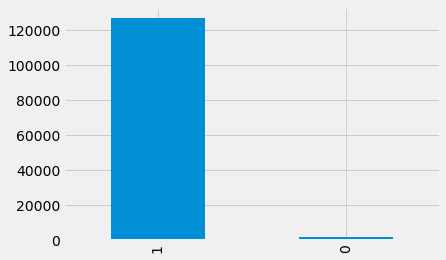

In [68]:

dff['LOAN_CLASSIFICATION'].value_counts().plot.bar()
plt.plot()

In [69]:
print("The data has {} Performing Loans and {} Non Performing Loans".format(dff['LOAN_CLASSIFICATION'].value_counts()[1], dff['LOAN_CLASSIFICATION'].value_counts()[0]))

The data has 126789 Performing Loans and 2127 Non Performing Loans


In [70]:
counts = dff['LOAN_CLASSIFICATION'].value_counts()
Performing = counts[1]
NonPerforming = counts[0]
percent_Performing = (Performing/(Performing+NonPerforming))*100
percent_NonPerforming = (NonPerforming/(Performing+NonPerforming))*100
print('There are {} Performing loans ({:.2f}%) and {} Non Performing loans ({:.2f}%).'.format(Performing, percent_Performing, NonPerforming, percent_NonPerforming))

There are 126789 Performing loans (98.35%) and 2127 Non Performing loans (1.65%).


Preprocessing the dataframe for model creation and analysis

Splitting the data into Train and Test sets. Setting the train set to contain 70% of the dataset and the test set to contain 30% of the dataset.

In [71]:
dff.dropna()

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  \
0                1          10014006.0               8   
1                2         100323005.0               4   
2                3         100426005.0               4   
3                4         100454005.0               6   
4                5         100625004.0               4   
...            ...                 ...             ...   
110941      110942         995580008.0               1   
110942      110943         990829008.0               1   
110943      110944         958072001.0               1   
110944      110945         999808007.0               1   
110945      110946         957342004.0               1   

        HIGHEST_BALANCE_RATING  BALANCE_HISTORY_RATING  history_Rating  \
0                            8                      10               4   
1                            8                      10               6   
2                            8                      10               4   
3                            7                      10               4   
4                           10                      10               5   
...                        ...                     ...             ...   
110941                       1                       1               1   
110942                       1                       1               1   
110943                       1                       1               1   
110944                       1                       1               1   
110945                       1                       1               1   

        loanHistory_Rating  Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  \
0                        5               8            1                    1   
1                        6               0           10                    1   
2                        5               6            1                    0   
3                        5               6            1                    1   
4                        5               0           10                    1   
...                    ...             ...          ...                  ...   
110941                   1               1           10                    1   
110942                   1               1           10                    1   
110943                   1               1           10                    1   
110944                   1               1           10                    1   
110945                   1               1           10                    1   

        NEW_LOAN_RATING  
0                     6  
1                     6  
2                     8  
3                     5  
4                     5  
...                 ...  
110941                1  
110942                1  
110943                1  
110944                1  
110945                1  

[110946 rows x 11 columns]

In [72]:
spl = np.random.rand(len(dff)) <= 0.70
train = dff[spl]
test = dff[~spl]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (90259, 11)
Test Shape: (38657, 11)


Reset the indexing of both the train and test sets

In [73]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Trying to look for a balance for our data set, since the cases of Non-Performing loans are way smaller than the Performing cases. I will randomly try to select an equal amount of Performing and Non Performing cases.

First we find the number of Non-Performing Cases in our train data dataset.

In [74]:
PerformCount = train['LOAN_CLASSIFICATION'].value_counts()[1]
NonPerformCount = train['LOAN_CLASSIFICATION'].value_counts()[0]
print('The train dataset has {} Performing loans.'.format(PerformCount))
print('The train dataset has {} Performing loans.'.format(NonPerformCount))

The train dataset has 88777 Performing loans.
The train dataset has 1482 Performing loans.


Now we randomly select the same number of non fraudulent cases from our train dataset

In [75]:
NonPerform = train[train['LOAN_CLASSIFICATION'] == 0]
Perform = train[train['LOAN_CLASSIFICATION'] == 1]
Perform.head()

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  HIGHEST_BALANCE_RATING  \
1           4         100454005.0               6                       7   
2           5         100625004.0               4                      10   
3           6          10077005.0               6                       8   
5           8         100894008.0               4                       6   
6           9         100933001.0               4                       6   

   BALANCE_HISTORY_RATING  history_Rating  loanHistory_Rating  Balance_Rating  \
1                      10               4                   5               6   
2                      10               5                   5               0   
3                      10               4                   6               0   
5                       7               6                   6               0   
6                       7               5                   5               0   

   Debt_Rating  LOAN_CLASSIFICATION  NEW_LOAN_RATING  
1            1                    1                5  
2           10                    1                5  
3            1                    1                7  
5           10                    1                6  
6            1                    1                5

In [76]:
print("Our train data has {} Performing Loans and {} Non Performing Loans".format(train['LOAN_CLASSIFICATION'].value_counts()[1], train['LOAN_CLASSIFICATION'].value_counts()[0]))

Our train data has 88777 Performing Loans and 1482 Non Performing Loans


In [77]:
print("While our test data has {} Performing Loans and {} Non Performing Loans".format(test['LOAN_CLASSIFICATION'].value_counts()[1], test['LOAN_CLASSIFICATION'].value_counts()[0]))

While our test data has 38012 Performing Loans and 645 Non Performing Loans


In [78]:
RS = Perform.sample(NonPerformCount)
RS

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  HIGHEST_BALANCE_RATING  \
61809       88348         689664014.0               1                       1   
10556       15141         808718001.0               4                       8   
85421      122036                 NaN               1                       1   
26728       38352         517993012.0               1                       1   
52318       74907         576424000.0               1                       1   
...           ...                 ...             ...                     ...   
16066       23033         160979003.0               1                       1   
29625       42513         345021004.0               1                       1   
71711      102389         839611008.0               1                       1   
79214      113145                 NaN               1                       1   
63202       90330         708933007.0               1                       1   

       BALANCE_HISTORY_RATING  history_Rating  loanHistory_Rating  \
61809                       1               1                   1   
10556                      10               6                   6   
85421                       1               1                   1   
26728                       1               1                   1   
52318                       1               1                   1   
...                       ...             ...                 ...   
16066                       1               1                   1   
29625                       1               1                   1   
71711                       1               1                   1   
79214                       1               1                   1   
63202                       1               1                   1   

       Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  NEW_LOAN_RATING  
61809               1           10                    1                1  
10556               4            1                    1                5  
85421               1            1                    1                1  
26728               1           10                    1                1  
52318               1           10                    1                1  
...               ...          ...                  ...              ...  
16066               1           10                    1                1  
29625               1           10                    1                1  
71711               1           10                    1                1  
79214               1            1                    1                1  
63202               1           10                    1                1  

[1482 rows x 11 columns]

In [79]:
RS.dropna()

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  HIGHEST_BALANCE_RATING  \
61809       88348         689664014.0               1                       1   
10556       15141         808718001.0               4                       8   
26728       38352         517993012.0               1                       1   
52318       74907         576424000.0               1                       1   
73257      104604         861742007.0               1                       1   
...           ...                 ...             ...                     ...   
38370       54986         426980006.0               1                       1   
16066       23033         160979003.0               1                       1   
29625       42513         345021004.0               1                       1   
71711      102389         839611008.0               1                       1   
63202       90330         708933007.0               1                       1   

       BALANCE_HISTORY_RATING  history_Rating  loanHistory_Rating  \
61809                       1               1                   1   
10556                      10               6                   6   
26728                       1               1                   1   
52318                       1               1                   1   
73257                       1               1                   1   
...                       ...             ...                 ...   
38370                       1               1                   1   
16066                       1               1                   1   
29625                       1               1                   1   
71711                       1               1                   1   
63202                       1               1                   1   

       Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  NEW_LOAN_RATING  
61809               1           10                    1                1  
10556               4            1                    1                5  
26728               1           10                    1                1  
52318               1           10                    1                1  
73257               1            3                    1                1  
...               ...          ...                  ...              ...  
38370               1           10                    1                1  
16066               1           10                    1                1  
29625               1           10                    1                1  
71711               1           10                    1                1  
63202               1           10                    1                1  

[1266 rows x 11 columns]

In [80]:
sum(RS.isnull().values.ravel())

216

Joining both the Fraud and RS dataframes together

In [81]:
setSample = pd.concat([NonPerform, RS])

In [82]:
len(setSample)

2964

In [83]:
setSample.head(10)

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  HIGHEST_BALANCE_RATING  \
0            3         100426005.0               4                       8   
4            7         100887001.0               4                       7   
12          19         101619004.0               4                       8   
19          29         102546001.0               5                       8   
25          40         102990001.0               4                       7   
32          49         103996004.0               4                      10   
45          68          10568001.0               4                       8   
49          73         105841001.0               4                       9   
50          75          10589002.0               4                       9   
91         132          11029002.0               5                       9   

    BALANCE_HISTORY_RATING  history_Rating  loanHistory_Rating  \
0                       10               4                   5   
4                       10               4                   5   
12                       9               4                   5   
19                       8               4                   5   
25                      10               4                   6   
32                      10               4                   6   
45                      10               4                   6   
49                      10               6                   6   
50                      10               4                   5   
91                      10               4                   6   

    Balance_Rating  Debt_Rating  LOAN_CLASSIFICATION  NEW_LOAN_RATING  
0                6            1                    0                8  
4                0            1                    0                5  
12               0            1                    0                6  
19               0            1                    0                7  
25               4            1                    0                5  
32               0            1                    0                7  
45               0            1                    0                7  
49               6            1                    0                6  
50               6            1                    0                7  
91               8            1                    0                7

Notice how the data is arranged in the order with which we have imported it. Now we reshuffle the index of the data set

In [84]:
setSample = setSample.sample(frac=1).reset_index(drop=True)
setSample.head(10)

Unnamed: 0  CUSTOMER_UNIQUE_ID  BALANCE_RATING  HIGHEST_BALANCE_RATING  \
0       47533          37708000.0               1                       1   
1       12278         675040003.0               4                       6   
2        2923         316775006.0               4                       8   
3       12609         685205007.0               4                       9   
4       74382         572306008.0               1                       1   
5      126865                 NaN               1                       1   
6       98618         801053006.0               1                       1   
7        6686         468229007.0               4                       8   
8       27847         219722000.0               1                       1   
9       28890         230286009.0               1                       1   

   BALANCE_HISTORY_RATING  history_Rating  loanHistory_Rating  Balance_Rating  \
0                       1               1                   1               1   
1                       8               5                   5               0   
2                      10               4                   5               0   
3                      10               4                   5               0   
4                       1               1                   1               1   
5                       1               1                   1               1   
6                       1               1                   1               1   
7                      10               4                   6               0   
8                       1               1                   1               1   
9                       1               1                   1               1   

   Debt_Rating  LOAN_CLASSIFICATION  NEW_LOAN_RATING  
0           10                    1                1  
1            1                    1                6  
2            1                    0                7  
3            1                    0                8  
4            9                    1                1  
5            1                    1                1  
6           10                    1                1  
7            1                    0                7  
8           10                    1                1  
9           10                    1                1

***Renaming our dataset for easy manipulation

In [85]:
dt=setSample

**Taking a look at correlation of the new set sample

In [86]:
corr = dt.corr()
corr = corr[['LOAN_CLASSIFICATION']]
corr

LOAN_CLASSIFICATION
Unnamed: 0                         0.724918
CUSTOMER_UNIQUE_ID                -0.105319
BALANCE_RATING                    -0.790684
HIGHEST_BALANCE_RATING            -0.837764
BALANCE_HISTORY_RATING            -0.840592
history_Rating                    -0.769857
loanHistory_Rating                -0.830503
Balance_Rating                     0.073604
Debt_Rating                        0.620460
LOAN_CLASSIFICATION                1.000000
NEW_LOAN_RATING                   -0.841937

In [87]:
#Correlation greater than 0.5, that is positive correlation
corr[corr['LOAN_CLASSIFICATION'] > 0.5]

LOAN_CLASSIFICATION
Unnamed: 0                      0.724918
Debt_Rating                     0.620460
LOAN_CLASSIFICATION             1.000000

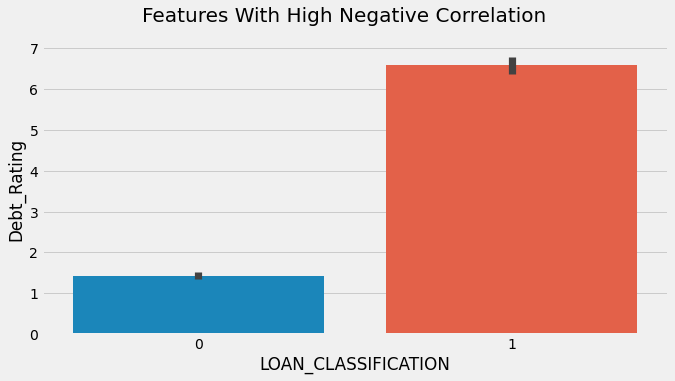

In [88]:
f, axes = plt.subplots(figsize=(10,5))
f.suptitle('Features With High Negative Correlation', size=20)
sns.barplot(x="LOAN_CLASSIFICATION", y="Debt_Rating", data=setSample)

In [89]:
#Correlation less than -0.5, that is positive correlation
corr[corr['LOAN_CLASSIFICATION'] < 0.5]

LOAN_CLASSIFICATION
CUSTOMER_UNIQUE_ID                -0.105319
BALANCE_RATING                    -0.790684
HIGHEST_BALANCE_RATING            -0.837764
BALANCE_HISTORY_RATING            -0.840592
history_Rating                    -0.769857
loanHistory_Rating                -0.830503
Balance_Rating                     0.073604
NEW_LOAN_RATING                   -0.841937

Visualising features with negative correlation

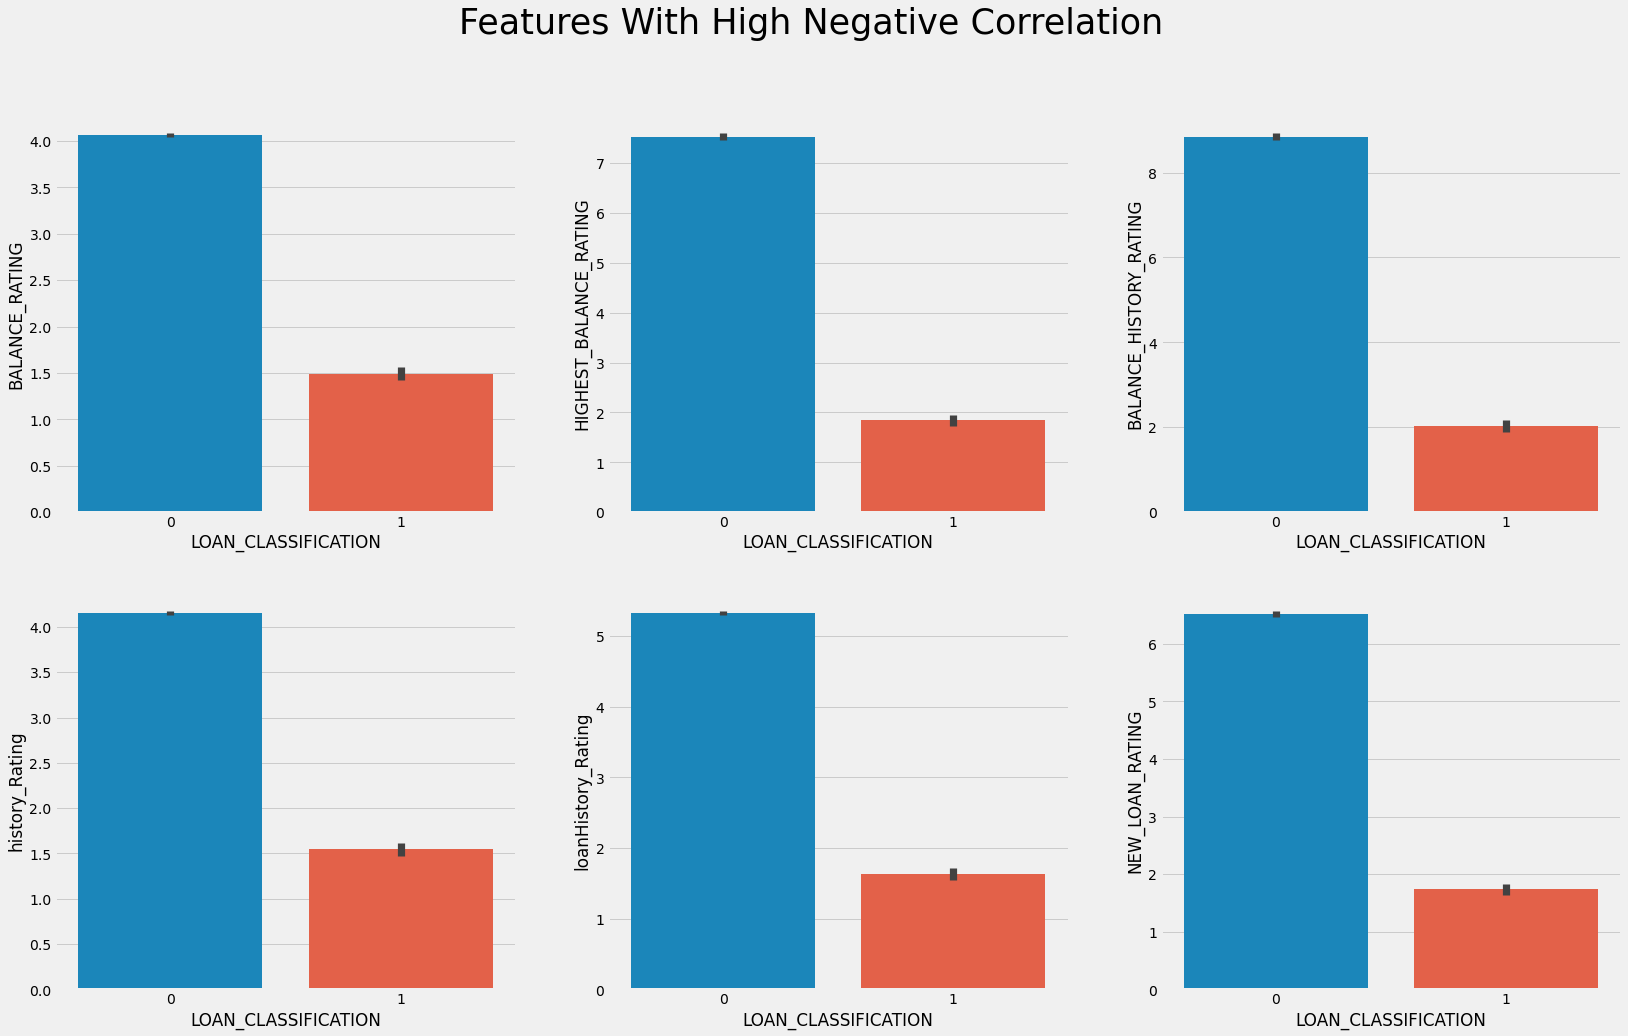

In [90]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.barplot(x="LOAN_CLASSIFICATION", y="BALANCE_RATING", data=setSample, ax=axes[0,0])
sns.barplot(x="LOAN_CLASSIFICATION", y="HIGHEST_BALANCE_RATING", data=setSample, ax=axes[0,1])
sns.barplot(x="LOAN_CLASSIFICATION", y="BALANCE_HISTORY_RATING", data=setSample, ax=axes[0,2])
sns.barplot(x="LOAN_CLASSIFICATION", y="history_Rating", data=setSample, ax=axes[1,0])
sns.barplot(x="LOAN_CLASSIFICATION", y="loanHistory_Rating", data=setSample, ax=axes[1,1])
sns.barplot(x="LOAN_CLASSIFICATION", y="NEW_LOAN_RATING", data=setSample, ax=axes[1,2])

**t_SNE Dimensionality Reduction

In [91]:
X = dt.drop(['LOAN_CLASSIFICATION', 'CUSTOMER_UNIQUE_ID'], axis=1)
Y = dt['LOAN_CLASSIFICATION']

In [92]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

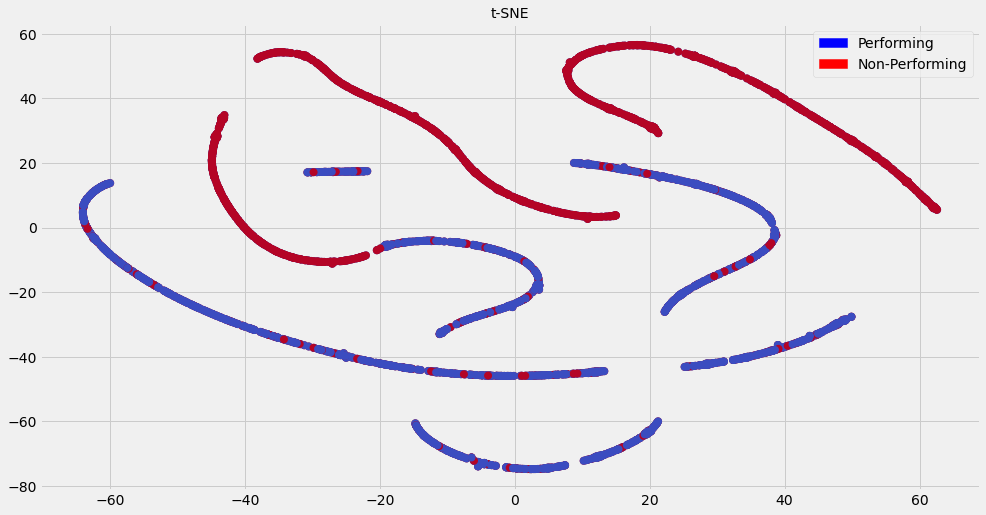

In [93]:
# t_SNE plot
f, ax = plt.subplots(figsize=(15,8))


blue_patch = mpatches.Patch(color='blue', label='Performing')
red_patch = mpatches.Patch(color='red', label='Non-Performing')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='Performing', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='Non-Performing', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classifier Algorithms
1. LogisticRegression
2. LinearDiscriminantAnalysis
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. Support Vector Machines (SVC)
6. XGBClassifier
7. RandomForestClassifier

Importing the libraries needed for classifier algorithms

In [94]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


Initialising WARNINGS:

In [95]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Initialising the train_test_split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [97]:
X_train = X_train.values
X_validation = X_test.values
Y_train = Y_train.values
Y_validation = Y_test.values

In [98]:
# Creating a list for the models to be stored in
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

Testing the models

In [99]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=20)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    md = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(md)

LR: 0.966668 (0.019155)
LDA: 0.954867 (0.020797)
KNN: 0.960427 (0.009790)
CART: 0.917720 (0.019943)
SVM: 0.939854 (0.013314)
XGB: 0.984404 (0.013375)
RF: 0.982472 (0.007926)
NB: 0.935926 (0.015747)


Visualising the performance of the various models using boxplots

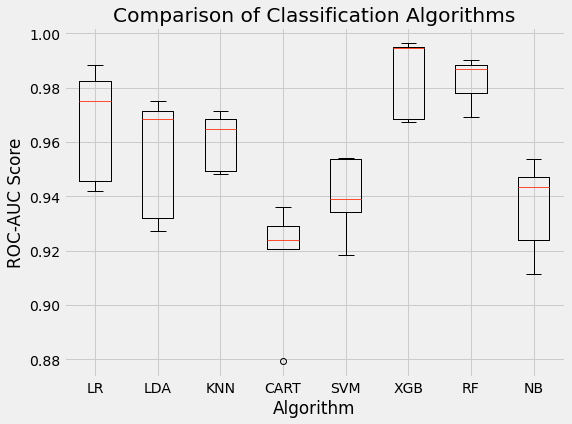

In [100]:
fig = plt.figure(figsize=(8,6))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

***Decision Tree Visualization

In [101]:
#Random Forest Classifier with 10 fold estimators
RFC_model = RandomForestClassifier(n_estimators=1000)
RFC_fit = RFC_model.fit(X_train, Y_train)
RFC_fit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Extracting a single tree

In [102]:
est = RFC_model.estimators_[999]
est

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=553692260, splitter='best')

In [103]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(est, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command that requires Graphviz
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the image in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [104]:
predicted = RFC_model.predict(X_test)

In [105]:
predicted1 = pd.DataFrame(predicted)
predicted1

0
0     0
1     0
2     1
3     0
4     0
...  ..
2367  0
2368  1
2369  1
2370  0
2371  0

[2372 rows x 1 columns]

In [107]:
RFC_probs = RFC_model.predict_proba(X_test)[:, 1]

In [108]:
RFC_probs

array([0.035, 0.036, 1.   , ..., 1.   , 0.001, 0.   ])

In [109]:
from sklearn.metrics import roc_auc_score

# calculate roc auc
roc_value = roc_auc_score(Y_test, RFC_probs)

In [110]:
roc_value

0.9761801668828066

In [111]:
roc_pred = roc_auc_score(Y_test, predicted)
roc_pred

0.9393642072213501